In [2]:
import pandas as pd
import requests

# https://api.eia.gov/v2/electricity/rto/daily-fuel-type-data/data/?frequency=daily&data[0]=value&facets[respondent][]=US48&facets[timezone][]=Eastern&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000
# Daily net generation by balancing authority and energy source. Source: Form EIA-930 Product: Hourly Electric Grid Monitor

# Download raw data using API
URL = 'https://api.eia.gov/v2/electricity/rto/daily-fuel-type-data/data/?api_key=q6uV6bK4CBECvdpqyeQ6CvldEcQazws5pSJqaw6D&frequency=daily&data[0]=value&facets[respondent][]=US48&facets[timezone][]=Eastern&start=2021-01-01&end=2023-01-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&out=json'
#URL = 'https://api.eia.gov/series/?series_id=PET.MCRRIP12.M&api_key=q6uV6bK4CBECvdpqyeQ6CvldEcQazws5pSJqaw6D&out=json'
#URL = 'http://api.eia.gov/category/?api_key=q6uV6bK4CBECvdpqyeQ6CvldEcQazws5pSJqaw6D&category_id=3&out=json'
#URL = 'https://api.eia.gov/v2/electricity/retail-sales&api_key=q6uV6bK4CBECvdpqyeQ6CvldEcQazws5pSJqaw6D&out=json'
headers = {'Accept-Encoding': 'identity'}
r = requests.get(URL, headers=headers)
#print(r.text[:10000])
# df = pd.DataFrame(r.json())
json_data = r.json()

# convert json data format to pandas DataFrame, then extract data as 'list_data' list of dictionaries
df_json = pd.DataFrame(json_data)
list_data = df_json.at['data', 'response']

# convert data from list of dictionaries format to pandas DataFrame format
col_names = list_data[0].keys() # create list of column names as 'col_names' dictionary
col_names = list(col_names) # convert 'col_names' dictionary to list
df = pd.DataFrame(list_data, columns=col_names) # convert 'list_data' list of dictionaries to 'pd' pandas DataFrame
df

,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units
0,2023-01-01,US48,United States Lower 48,COL,Coal,Eastern,Eastern,1750785,megawatthours
1,2023-01-01,US48,United States Lower 48,WND,Wind,Eastern,Eastern,1050082,megawatthours
2,2023-01-01,US48,United States Lower 48,WAT,Hydro,Eastern,Eastern,607088,megawatthours
3,2023-01-01,US48,United States Lower 48,SUN,Solar,Eastern,Eastern,176563,megawatthours
4,2023-01-01,US48,United States Lower 48,OTH,Other,Eastern,Eastern,211049,megawatthours
...,...,...,...,...,...,...,...,...,...
4995,2021-04-17,US48,United States Lower 48,SUN,Solar,Eastern,Eastern,296709,megawatthours
4996,2021-04-17,US48,United States Lower 48,OTH,Other,Eastern,Eastern,152546,megawatthours
4997,2021-04-17,US48,United States Lower 48,OIL,Petroleum,Eastern,Eastern,9012,megawatthours
4998,2021-04-17,US48,United States Lower 48,NUC,Nuclear,Eastern,Eastern,1860665,megawatthours


Success!
Success!
Success!
Success!
Success!


Text(2009-02-01 00:00:00, -1000, 'Source: Energy Information Administration www.eia.gov')

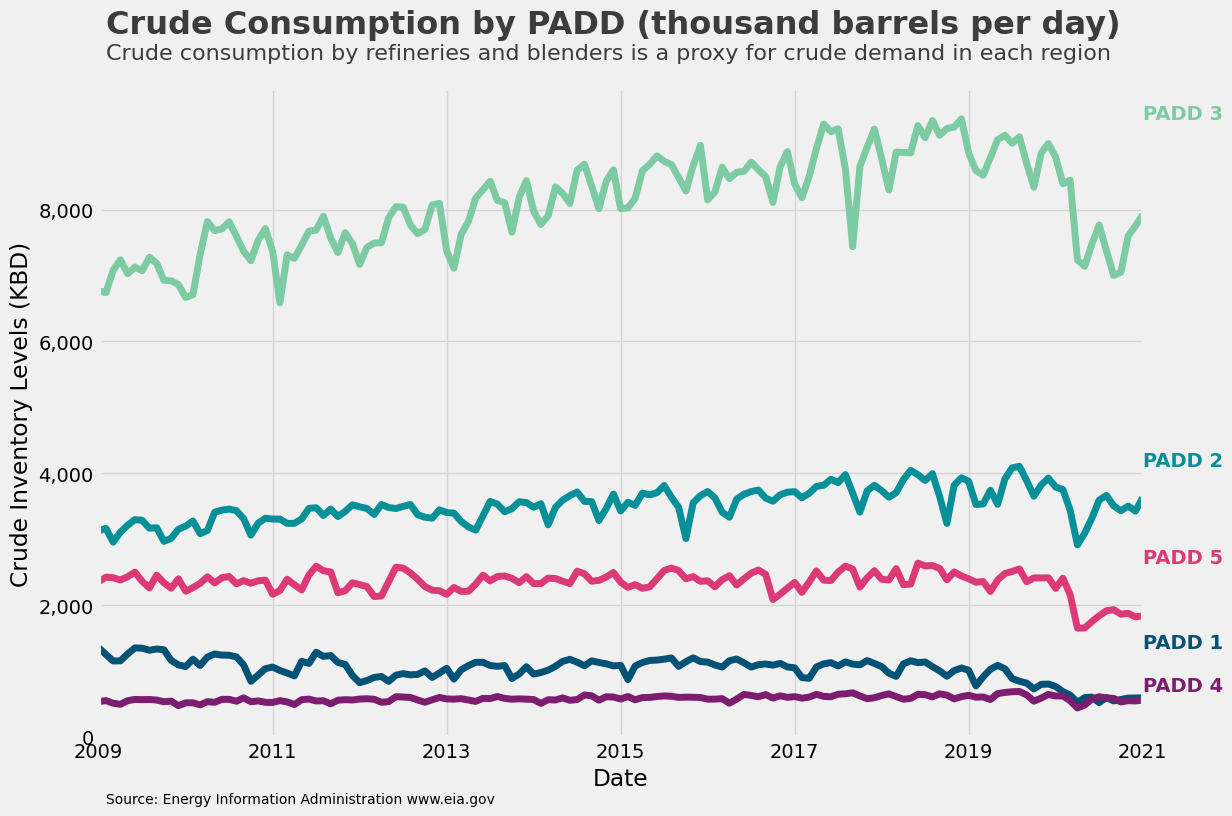

In [16]:
#Import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import matplotlib.ticker as ticker

# API Key from EIA
api_key = 'q6uV6bK4CBECvdpqyeQ6CvldEcQazws5pSJqaw6D'
# PADD Names to Label Columns
# Change to whatever column labels you want to use.
PADD_NAMES = ['PADD 1','PADD 2','PADD 3','PADD 4','PADD 5']
# Enter all your Series IDs here separated by commas
PADD_KEY = ['PET.MCRRIP12.M',
'PET.MCRRIP22.M',
'PET.MCRRIP32.M',
'PET.MCRRIP42.M',
'PET.MCRRIP52.M']
# Initialize list - this is the final list that you will store all the data from the json pull. Then you will use this list to concat into a pandas dataframe. 
final_data = []
# Choose start and end dates
startDate = '2009-01-01'
endDate = '2021-01-01'

# Pull in data via EIA API
for i in range(len(PADD_KEY)):
    url = 'http://api.eia.gov/series/?api_key=' + api_key + '&series_id=' + PADD_KEY[i]
    r = requests.get(url)
    json_data = r.json()
    
    if r.status_code == 200:
        print('Success!')
    else:
        print('Error')
    
    df = pd.DataFrame(json_data.get('series')[0].get('data'),
                      columns = ['Date', PADD_NAMES[i]])
    df.set_index('Date', drop=True, inplace=True)
    final_data.append(df)

# Combine all the data into one dataframe
crude = pd.concat(final_data, axis=1)

# Create date as datetype datatype
crude['Year'] = crude.index.astype(str).str[:4]
crude['Month'] = crude.index.astype(str).str[4:]
crude['Day'] = 1
crude['Date'] = pd.to_datetime(crude[['Year','Month','Day']])
crude.set_index('Date',drop=True,inplace=True)
crude.sort_index(inplace=True)
crude = crude[startDate:endDate]
crude = crude.iloc[:,:5]

# Generating Colours and Style
colors = {'PADD 1':'#045275', 
          'PADD 2':'#089099', 
          'PADD 3':'#7CCBA2', 
          'PADD 4':'#7C1D6F', 
          'PADD 5':'#DC3977'}
plt.style.use('fivethirtyeight')
# Creating the Visualization
plot = crude.plot(figsize=(12,8), 
                  color=list(colors.values()), 
                  linewidth=5, 
                  legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Crude Inventory Levels (KBD)')
# Assigning Colour
for padd in list(colors.keys()):
    plot.text(x = crude.index[-1], y = crude[padd].max(), color = 
    colors[padd], s = padd, weight = 'bold')
# Adding Labels
plot.text(x = crude.index[1], 
          y = int(crude.max().max())+1300, 
          s = "Crude Consumption by PADD (thousand barrels per day)", 
          fontsize = 23, 
          weight = 'bold', 
          alpha = .75)
plot.text(x = crude.index[1], 
          y = int(crude.max().max())+900, 
          s = "Crude consumption by refineries and blenders is a proxy for crude demand in each region", 
          fontsize = 16, 
          alpha = .75)
plot.text(x = crude.index[1], 
          y = -1000,
          s = 'Source: Energy Information Administration www.eia.gov', 
          fontsize = 10)

In [ ]:
import requests
import pandas as pd

params = {'api_key': 'q6uV6bK4CBECvdpqyeQ6CvldEcQazws5pSJqaw6D'}
try:
    #(r := requests.get('https://api.eia.gov/v2/nuclear-outages/facility-nuclear-outages/data', params=params)).raise_for_status()
    (r := requests.get('https://api.eia.gov/v2/electricity/rto/daily-fuel-type-data/data/?frequency=daily&data[0]=value&facets[respondent][]=US48&facets[timezone][]=Eastern&start=2021-01-01&end=2023-01-01&sort[0][column]=period&sort[0][direction]=desc&offset=0', params=params)).raise_for_status()
    #(r := requests.get('https://api.eia.gov/v2/electricity/rto/daily-fuel-type-data/data/?frequency=daily&data[0]=value&facets[respondent][]=US48&facets[timezone][]=Eastern&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000', params=params)).raise_for_status()
    dataframe = pd.DataFrame(r.json())
    print(dataframe)
except Exception as e:
    print(f'Data acquisition failed due to {e}')

                                                      response  \
warnings     [{'warning': 'incomplete return', 'description...   
total                                                   583610   
dateFormat                                          YYYY-MM-DD   
frequency                                                daily   
data         [{'period': '2008-01-16', 'facility': 1925, 'f...   
description  Facility level nuclear outages with capacity, ...   
command                                                    NaN   
params                                                     NaN   

                                                       request apiVersion  
warnings                                                   NaN      2.1.0  
total                                                      NaN      2.1.0  
dateFormat                                                 NaN      2.1.0  
frequency                                                  NaN      2.1.0  
data                     

In [ ]:
import pandas as pd
import requests
#pip install EIA_python
import eia

api_key = 'q6uV6bK4CBECvdpqyeQ6CvldEcQazws5pSJqaw6D'
api = eia.API(api_key)

url = 'https://api.eia.gov/v2/electricity/rto/daily-fuel-type-data/data/?api_key=q6uV6bK4CBECvdpqyeQ6CvldEcQazws5pSJqaw6D&frequency=daily&data[0]=value&facets[respondent][]=US48&facets[timezone][]=Eastern&start=2021-01-01&end=2023-01-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&out=json'
r = requests.get(url)
json_data = r.json()

if r.status_code == 200:
    print('Success!')
else:
    print('Error')

json_data = r.json()
json_data
#df = pd.DataFrame(json_data.get('series')[0].get('data'), columns = ['Date', PADD_NAMES[i]])


Success!
